<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/11_edge_linking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request

In [ ]:
url = "https://github.com/leinaxd/NOTES/raw/main/digital_image_processing/notebooks/bank.jpeg"
with urllib.request.urlopen(url) as url:
    img = plt.imread(url, format='jpg')
plt.imshow(img)
plt.axis('off')

print(img.shape)

In [ ]:
r_mask = img[:, :, 0]
g_mask = img[:, :, 1]
b_mask = img[:, :, 2]

#turn image to gray
g_img = r_mask*0.2989 + g_mask*0.5870 + b_mask*0.1140
u_img = np.uint8(g_img)

Boundary following

[0 0 0 0 0 0 0 0 0 0 7 0 0 7 7 7 1 7 0 1]


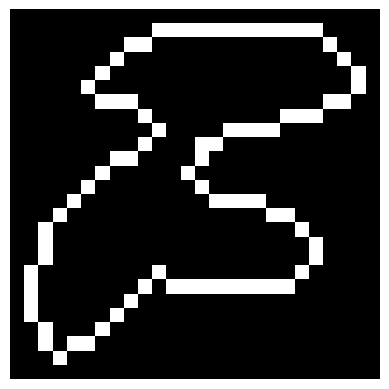

In [16]:
shape_1 = np.array(
    [[0,0,0,0,0,0,0,0],
     [0,0,1,1,1,1,0,0],
     [0,1,0,0,1,0,0,0],
     [0,0,1,0,1,0,0,0],
     [0,1,0,0,1,0,0,0],
     [0,1,1,1,1,0,0,0],
     [0,0,0,0,0,0,0,0]])

abs_coding_1 = np.array([0,0,0,5,6,6,6,4,4,4,2,1,3,1])
rel_coding_1 = np.array([0,0,5,1,0,0,6,0,0,6,7,2,6,7])

shape_2 = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
     [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
     [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
     [0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0],
     [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
     [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
     [0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

abs_coding_2 = np.array([0,0,0,0, 0,0,0,0, 0,0,0,7, 7,7,6,5, 4,5,4,4, 5,4,4,4, 5,5,5,7, 7,0,0,0, 7,0,7,7, 6,5,5,4, 4,4,4,4, 4,4,4,3, 5,5,5,5, 5,4,5,3, 2,3,2,2, 2,1,2,2, 1,1,1,1, 1,0,1,1, 3,3,4,4, 3,1,1,1, 0])
rel_coding_2 = np.mod(abs_coding_2[1:]-abs_coding_2[:-1], 8)
start = (1,10) #calculated automatically (first non 0)

plt.imshow(shape_2, cmap='gray')
plt.axis('off');

Moores algorithm

Polygon fitting